<a href="https://colab.research.google.com/github/EnFiore/Master-AI/blob/main/5%20-%20Reti%20Neurali/neural_networks_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classificazione di cifre scritte a mano
In questa esercitazione dovrai addestrare un modello di rete neurale artificiale in grado di riconoscere cifre scritte a mano. <br/>
Puoi scaricare il dataset da utilizzare dall'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/optical+recognition+of+handwritten+digits). I file sono [optdigits.tra](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra) per il train set e [optdigits.tes](https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes) per il test set.
Riesci a comprendere il formato di questi file? Ma certo! Dopo averlo fatto, utilizzali per addestrare un multilayer perceptron, questo modello era effettivamente la scelta migliore?

### Scarichiamo i dati

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes

--2025-10-16 14:19:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘optdigits.tra’

optdigits.tra           [   <=>              ] 550.43K  1.08MB/s    in 0.5s    

2025-10-16 14:19:12 (1.08 MB/s) - ‘optdigits.tra’ saved [563639]

--2025-10-16 14:19:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘optdigits.tes’

optdigits.tes           [  <=>               ] 258.51K   609KB/s    in 0.4s    

2025-10-16 14:19:13 (609 KB/s) - ‘optdigits.tes’

### Importiamo i moduli

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

### Definiamo le funzioni

In [3]:
RANDOM_SEED = 0

### Carichiamo i dati

In [5]:
from numpy import genfromtxt
#i dati sono immagini sotto forma di testo
arr = genfromtxt('optdigits.tra', delimiter=',')
arr.shape

(3823, 65)

7.0


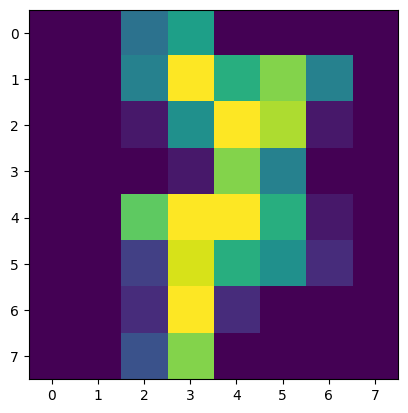

In [8]:
sample_num = 200 #immagine numero 100
#recupero valore target
print(arr[sample_num,-1])
#ricrea immagine come matrice 8x8
plt.imshow(arr[sample_num,:-1].reshape(8,8))

### Processiamo i dati

In [9]:
#tutte le righe tanne l'ultima colonna
X = arr[:,:-1]
#tengo tutte le ricghe e ultima colonna ha il target
y = arr[:,-1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

Per fare la normalizzazione basta dividere per il valore massimo, perchè il range va da 0 a 255 e quindi basta dividere per il valore massimo

In [12]:
x_max = X_train.max()
X_train/=x_max
X_test/=x_max

### Multilayer Perceptron

In [13]:
mlp = MLPClassifier(random_state=RANDOM_SEED)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

Valutiamo il modello

In [16]:
mlp.score(X_test, y_test)

0.9764705882352941

In [18]:
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        81
         1.0       0.95      1.00      0.97        76
         2.0       1.00      0.99      0.99        76
         3.0       0.96      1.00      0.98        75
         4.0       0.99      0.97      0.98        72
         5.0       1.00      0.96      0.98        71
         6.0       0.94      0.99      0.96        76
         7.0       1.00      1.00      1.00        75
         8.0       0.97      0.95      0.96        80
         9.0       0.96      0.94      0.95        83

    accuracy                           0.98       765
   macro avg       0.98      0.98      0.98       765
weighted avg       0.98      0.98      0.98       765



restituisce l'accuracy  per le vari classi

### Visioniamo gli errori della rete

vedere le immagii che sono state classificate errate

In [20]:
errors_mask = y_pred!=y_test #maschera che seleziona y_pred che non coincide con y_test
#si usa l maschera per creare degli array con le sole immagini che hanno dato errore
X_errors = X_test[errors_mask] #solo le 18 immagini classificate errate
y_errors = y_test[errors_mask]
y_errors_pred = y_pred[errors_mask]
X_errors.shape

(18, 64)

In [21]:
X_test.shape[0]

765

In [22]:
y_errors

array([9., 5., 0., 4., 9., 6., 0., 9., 8., 8., 4., 2., 9., 9., 8., 8., 5.,
       5.])

visualizzo le 18 immagini

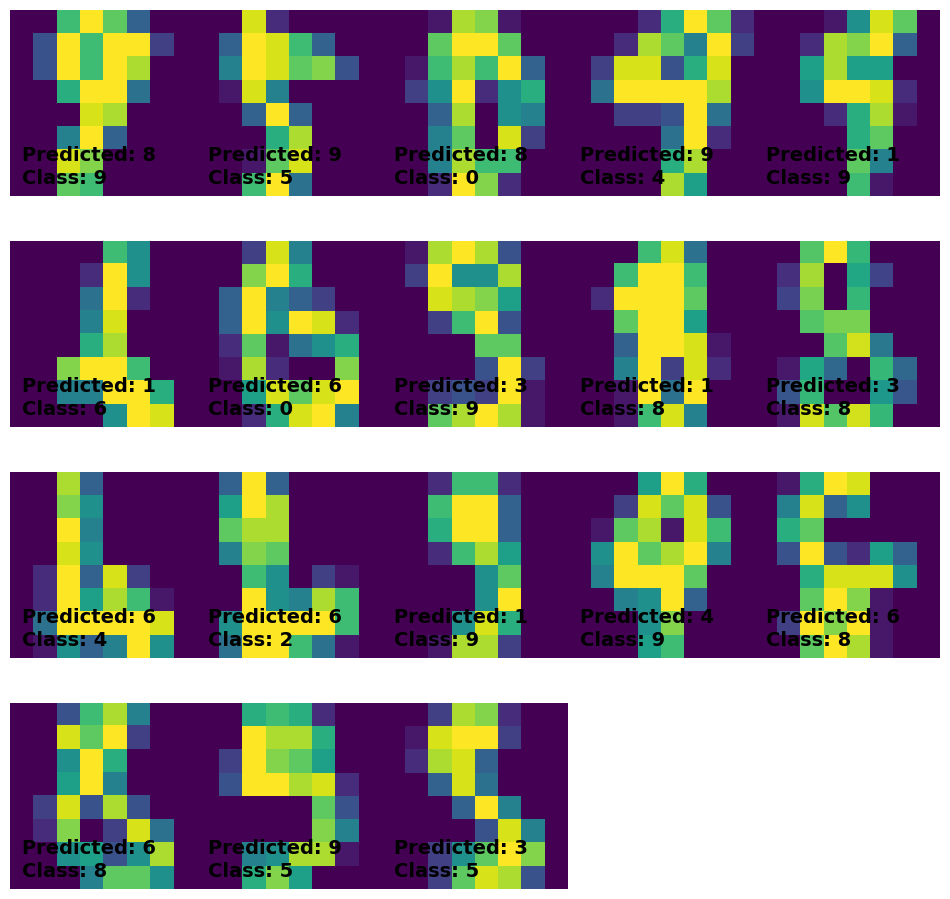

In [29]:
fig = plt.figure(figsize=(12,12))
#riduco lo spazio tra le immagini
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(X_errors.shape[0]):
  plot = fig.add_subplot(4, 5, i+1)
  #prendo i pixel dell'immagine della posizione i
  plt.imshow(X_errors[i,:].reshape(8,8))
  #posizono i valori predicteed e reali.
  plot.text(0, 7, #posizone in cui inseire le label
            f"Class: {int(y_errors[i])}",
            fontsize=14,
            fontdict={'weight': 'bold'}
  )
  plot.text(0, 6, f"Predicted: {int(y_errors_pred[i])}", fontsize=14, fontdict={'weight': 'bold'})
  plt.axis("off")

### Regressione Logistica

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9699346405228758

accuracy molto alta.

La rete non è stata ottimizzata.

Dipende se l'accuracy dello 0.97 può bastare
